<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML10_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vanishing/Exploding Gradients

###Xavier initialization
Logistic

Normal $\sigma = \sqrt{\frac{2}{n_{inputs} + n_{outputs}}}$

Uniform $r = \sqrt{\frac{6}{n_{inputs} + n_{outputs}}}$

###He initialization
ReLU(and its variants)

Normal $\sigma = \sqrt{2}\sqrt{\frac{2}{n_{inputs} + n_{outputs}}}$

Uniform $r = \sqrt{2}\sqrt{\frac{6}{n_{inputs} + n_{outputs}}}$

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/')

W0627 15:27:12.296002 140023442589568 deprecation.py:323] From <ipython-input-1-cfd3bd6057da>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0627 15:27:12.298028 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0627 15:27:12.305146 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0627 15:27:12.680953 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0627 15:27:12.763199 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [ ]:
import tensorflow as tf

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 2))

In [ ]:
n_hidden1 = 100

he_init = tf.initializers.he_normal()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, kernel_initializer=he_init, name='hidden1')

W0627 15:27:13.105423 140023442589568 deprecation.py:323] From <ipython-input-4-ee995ad9f4f9>:4: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


###Nonsaturating Activation Functions

$LeakyReLU_{\alpha}(z) = max(\alpha z, z)$

$ELU_\alpha(z) = \begin{cases} \alpha(exp(z) - 1), & \mbox{if } z < 0 \\ z & \mbox{if } z \geq 0 \end{cases}$

In [ ]:
X = tf.placeholder(tf.float32, (None, 2))

hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name='hidden2')

W0627 15:27:13.451204 140023442589568 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
def leaky_relu(z, name=None):
  return tf.maximum(0.01 * z, z, name=name)

In [ ]:
hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name='hidden2')

ValueError: ignored

##Batch Normalization

In [ ]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')

training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name='hidden2')
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name='outputs')
logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=0.9)

W0627 15:27:27.273236 140023442589568 deprecation.py:323] From <ipython-input-8-0c85b0b49265>:15: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


In [ ]:
from functools import partial

tf.reset_default_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10


X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')

training = tf.placeholder_with_default(False, shape=(), name='training')

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)
hidden2 = tf.layers.dense(bn1_act, n_hidden2, name='hidden2')
bn2 = my_batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)
logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name='outputs')
logits = my_batch_norm_layer(logits_before_bn)

In [ ]:
y = tf.placeholder(tf.int64, (None), name='y')

learning_rate = 1e-2

loss = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)

W0627 15:27:28.761709 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')

In [ ]:
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
batch_size = 128

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run([train_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch})
    accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print(epoch, 'Test accuracy:', accuracy_val)
  save_path = saver.save(sess, './my_model_final.ckpt')    
  

0 Test accuracy: 0.8978
1 Test accuracy: 0.9228
2 Test accuracy: 0.9351
3 Test accuracy: 0.943
4 Test accuracy: 0.9498
5 Test accuracy: 0.9528
6 Test accuracy: 0.9568
7 Test accuracy: 0.9605
8 Test accuracy: 0.9624
9 Test accuracy: 0.9649
10 Test accuracy: 0.9661
11 Test accuracy: 0.9677
12 Test accuracy: 0.9691
13 Test accuracy: 0.9707
14 Test accuracy: 0.9714
15 Test accuracy: 0.9726
16 Test accuracy: 0.9731
17 Test accuracy: 0.9719
18 Test accuracy: 0.9738
19 Test accuracy: 0.9751


###Gradient Clipping

In [ ]:
threshold = 1.0
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var) for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

##Transfer Learning

In [ ]:
saver = tf.train.import_meta_graph('./my_model_final.ckpt.meta')

In [ ]:
X = tf.get_default_graph().get_tensor_by_name('X:0')
y = tf.get_default_graph().get_tensor_by_name('y:0')
accuracy = tf.get_default_graph().get_tensor_by_name('accuracy:0')
training_op = tf.get_default_graph().get_operation_by_name('GradientDescent')

In [ ]:
for op in tf.get_default_graph().get_operations():
  print(op.name)

X
training/input
training
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
hidden1/MatMul
hidden1/BiasAdd
batch_normalization/gamma/Initializer/ones
batch_normalization/gamma
batch_normalization/gamma/Assign
batch_normalization/gamma/read
batch_normalization/beta/Initializer/zeros
batch_normalization/beta
batch_normalization/beta/Assign
batch_normalization/beta/read
batch_normalization/moving_mean/Initializer/zeros
batch_normalization/moving_mean
batch_normalization/moving_mean/Assign
batch_normalization/moving_mean/read
batch_normalization/moving_variance/Initializer/ones


In [ ]:
for op in (X, y, accuracy, training_op):
  tf.add_to_collection('my_important_ops', op)

In [ ]:
X, y, accuracy, training_op = tf.get_collection('my_important_ops')

In [ ]:
with tf.Session() as sess:
  saver.restore(sess, './my_model_final.ckpt')
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run([train_op, extra_update_ops], feed_dict={training: True, X: X_batch, y: y_batch})
    accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print(epoch, 'Test accuracy:', accuracy_val)

W0627 15:28:27.782959 140023442589568 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


0 Test accuracy: 0.9744
1 Test accuracy: 0.976
2 Test accuracy: 0.9747
3 Test accuracy: 0.975
4 Test accuracy: 0.9758
5 Test accuracy: 0.977
6 Test accuracy: 0.9756
7 Test accuracy: 0.9765
8 Test accuracy: 0.9769
9 Test accuracy: 0.9772
10 Test accuracy: 0.977
11 Test accuracy: 0.9767
12 Test accuracy: 0.9769
13 Test accuracy: 0.9767
14 Test accuracy: 0.9768
15 Test accuracy: 0.9774
16 Test accuracy: 0.978
17 Test accuracy: 0.979
18 Test accuracy: 0.9782
19 Test accuracy: 0.978


In [ ]:
tf.reset_default_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_hidden3 = 50
n_hidden4 = 50
n_hidden5 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
    logits = tf.layers.dense(hidden5, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
threshold = 1.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -threshold, threshold), var)
              for grad, var in grads_and_vars]
training_op = optimizer.apply_gradients(capped_gvs)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 20
batch_size = 200

In [ ]:

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size): 
            X_batch, y_batch = mnist.train.next_batch(batch_size=batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Validation accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Validation accuracy: 0.5445
1 Validation accuracy: 0.8121
2 Validation accuracy: 0.8842
3 Validation accuracy: 0.899
4 Validation accuracy: 0.9108
5 Validation accuracy: 0.9184
6 Validation accuracy: 0.9264
7 Validation accuracy: 0.93
8 Validation accuracy: 0.9355
9 Validation accuracy: 0.9386
10 Validation accuracy: 0.9432
11 Validation accuracy: 0.9435
12 Validation accuracy: 0.947
13 Validation accuracy: 0.9488
14 Validation accuracy: 0.9518
15 Validation accuracy: 0.955
16 Validation accuracy: 0.9543
17 Validation accuracy: 0.958
18 Validation accuracy: 0.9597
19 Validation accuracy: 0.9604


In [ ]:
tf.reset_default_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 50  # reused
n_hidden3 = 50  # reused
n_hidden4 = 20  # new!
n_outputs = 10  # new!

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='hidden[123]')
restore_saver = tf.train.Saver(reuse_vars)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
  init.run()
  restore_saver.restore(sess, './my_model_final.ckpt')
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size): 
            X_batch, y_batch = mnist.train.next_batch(batch_size=batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print(epoch, "Validation accuracy:", accuracy_val)
  save_path = saver.save(sess, "./my_model_final.ckpt")

0 Validation accuracy: 0.9059
1 Validation accuracy: 0.9304
2 Validation accuracy: 0.9413
3 Validation accuracy: 0.9477
4 Validation accuracy: 0.95
5 Validation accuracy: 0.9537
6 Validation accuracy: 0.9556
7 Validation accuracy: 0.9587
8 Validation accuracy: 0.9598
9 Validation accuracy: 0.9608
10 Validation accuracy: 0.9612
11 Validation accuracy: 0.9624
12 Validation accuracy: 0.9633
13 Validation accuracy: 0.9637
14 Validation accuracy: 0.9659
15 Validation accuracy: 0.9653
16 Validation accuracy: 0.9646
17 Validation accuracy: 0.9656
18 Validation accuracy: 0.9668
19 Validation accuracy: 0.9675


In [ ]:
train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='hidden[34]|outputs')
training_op = optimizer.minimize(loss, var_list=train_vars)

In [ ]:
import numpy as np

n_batches = mnist.train.num_examples // batch_size

with tf.Session() as sess:
  init.run()
  restore_saver.restore(sess, './my_model_final.ckpt')
  
  h2_cache = sess.run(hidden2, feed_dict={X: mnist.train.images})
  
  for epoch in range(n_epochs):
    shuffled_idx = np.random.permutation(mnist.train.num_examples)
    hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
    y_batches = np.array_split(mnist.train.labels[shuffled_idx], n_batches)
    for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
      sess.run(training_op, feed_dict={hidden2:hidden2_batch, y:y_batch})
      
    save_path = saver.save(sess, './my_new_model_final.ckpt')

##Optimizers

Gradient Descent

$\theta' = \theta - \eta\nabla_\theta J(\theta)$

Momentum Optimization

$m' = \beta m - \eta\nabla_\theta J(\theta) $

$\theta' = \theta + m$

In [ ]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)

Nestorov Accelerated Gradient

$m' = \beta m - \eta\nabla_\theta J(\theta + \beta m) $

$\theta' = \theta + m$

In [ ]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov=True)

AdaGrad

$s' = s + \nabla_\theta J(\theta)\otimes \nabla_\theta J(\theta)$

$\theta' = \theta - \eta \nabla_\theta J(\theta)\oslash \sqrt{s + \epsilon}$

DO NOT USE FOR DEEP NETWORKS

In [ ]:
optimizer = tf.train.AdagradOptimizer(learning_rate)

RMSProp

$s' =\beta s + (1 - \beta)\nabla_\theta J(\theta)\otimes \nabla_\theta J(\theta)$

$\theta' = \theta - \eta \nabla_\theta J(\theta)\oslash \sqrt{s + \epsilon}$

In [ ]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, momentum=0.9, decay=0.9, epsilon=1e-10)

Adam
(Adaptive moment estimation)

$m' = \beta_1 - (1 -\beta_1)\nabla_\theta J(\theta)$

$s' =\beta_2 s + (1 - \beta_2)\nabla_\theta J(\theta)\otimes \nabla_\theta J(\theta)$

$m'' = \frac{m'}{1 - \beta_1^t}$

$s'' = \frac{s'}{1 - \beta_2^t}$

$\theta' = \theta + \eta m''\oslash\sqrt{s'' + \epsilon}$

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

##Learning Rate Scheduling

In [ ]:
initial_learning_rate = 0.1
decay_steps = 10000
decay_rate = 1 / 10
global_step = tf.Variable(0, trainable=False, name='global_step')
learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, decay_steps, decay_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
training_op = optimizer.minimize(loss, global_step=global_step)

##Regularization

*   Early Stopping
*   $l1$ and $l2$ Regularization
*   Dropout
*   Max-Norm Regularization


In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

with tf.name_scope('DNN'):
  hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, kernel_initializer=tf.initializers.he_normal(), name='hidden1')
  logits = tf.layers.dense(hidden1, n_outputs, name='outputs')
  
W1 = tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')
W2 = tf.get_default_graph().get_tensor_by_name('outputs/kernel:0')

scale = 0.001 # l1 hyperparameter

with tf.name_scope('Loss'):
  xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  base_loss = tf.reduce_mean(xentr, name='avg_xentr')
  reg_losses = tf.reduce_sum(tf.abs(W1) + tf.reduce_sum(tf.abs(W2)))
  loss = tf.add(base_loss, scale * reg_losses, name='loss')
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
  training_op =  optimizer.minimize(loss)


In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
scale = 0.001 # l1 hyperparameter

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope('DNN'):
  hidden1 = my_dense_layer(X, n_hidden1, name='hidden1')
  hidden2 = my_dense_layer(hidden1, n_hidden2, name='hidden2')
  logits = my_dense_layer(hidden2, n_outputs, name='outputs')
with tf.name_scope('Loss'):
  xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  base_loss = tf.reduce_mean(xentr, name='avg_xentr')
  reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
  loss = tf.add_n([base_loss] + reg_losses, name='loss')
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
  training_op =  optimizer.minimize(loss)
  


In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
scale = 0.001 # l1 hyperparameter

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope('DNN'):
  hidden1 = my_dense_layer(X_drop, n_hidden1, name='hidden1')
  hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
  hidden2 = my_dense_layer(hidden1_drop, n_hidden2, name='hidden2')
  hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
  logits = my_dense_layer(hidden2_drop, n_outputs, name='outputs')
with tf.name_scope('Loss'):
  xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  base_loss = tf.reduce_mean(xentr, name='avg_xentr')
  reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
  loss = tf.add_n([base_loss] + reg_losses, name='loss')
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
  training_op =  optimizer.minimize(loss)
  


$w' = w\frac{r}{||w||_2}$

In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
scale = 0.001 # l1 hyperparameter

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope('DNN'):
  hidden1 = my_dense_layer(X_drop, n_hidden1, name='hidden1')
  hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
  hidden2 = my_dense_layer(hidden1_drop, n_hidden2, name='hidden2')
  hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
  logits = my_dense_layer(hidden2_drop, n_outputs, name='outputs')
  
threshold = 1.0
weights = tf.get_default_graph().get_tensor_by_name('hidden1/kernel:0')
clipped_weights = tf.clip_by_norm(weights, clip_norm=threshold, axes=1)
clip_weights = tf.assign(weights, clipped_weights)
  
with tf.name_scope('Loss'):
  xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  base_loss = tf.reduce_mean(xentr, name='avg_xentr')
  reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
  loss = base_loss#tf.add_n([base_loss] + reg_losses, name='loss')
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
  training_op =  optimizer.minimize(loss)
  
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
  init.run()
  sess.run(training_op, feed_dict={X: mnist.test.images, y: mnist.test.labels})
  clip_weights.eval()

In [ ]:
def max_norm_regulizer(threshold, axes=1, name='max_norm', collection='max_norm'):
  def max_norm(weights):
    clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
    clip_weights = tf.assign(weights, clipped, name=name)
    tf.add_to_collection(collection, clip_weights)
    return None
  return max_norm

In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

max_norm_reg = max_norm_regulizer(threshold=1.0)

with tf.name_scope('dnn'):
  hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name='hidden1', kernel_regularizer=max_norm_reg)
  hidden2 =tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name='hidden2', kernel_regularizer=max_norm_reg)
  logits = my_dense_layer(hidden2, n_outputs, name='outputs')
with tf.name_scope('Loss'):
  xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  base_loss = tf.reduce_mean(xentr, name='avg_xentr')
  reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
  loss = base_loss#tf.add_n([base_loss] + reg_losses, name='loss')
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
  training_op =  optimizer.minimize(loss)
  
init = tf.global_variables_initializer()

In [ ]:
clip_all_weights = tf.get_collection('max_norm')

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      sess.run(clip_all_weights)

## Task

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/')

W0701 11:05:07.640919 140210754443136 deprecation.py:323] From <ipython-input-1-cfd3bd6057da>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0701 11:05:07.643143 140210754443136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0701 11:05:07.649175 140210754443136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0701 11:05:08.872608 140210754443136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0701 11:05:09.410965 140210754443136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def CreateDNN(input_nn, n_layers=5, n_units=100, 
              activation_fn=tf.nn.elu, kernel_init=tf.initializers.he_normal(), name=None):
  with tf.variable_scope(name, "dnn"):
    for layer in range(n_layers):
      input_nn = tf.layers.dense(input_nn, n_units, activation_fn, 
                                 kernel_initializer=kernel_init, name='hidden'+str(layer))
  return input_nn

In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden = 100
n_outputs = 5

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

with tf.name_scope('DNN'):
  hidden = CreateDNN(X, 5, n_hidden)
  logits = tf.layers.dense(hidden, n_outputs, 
                               kernel_initializer=tf.initializers.he_normal(), name='outputs')
  
with tf.name_scope('Loss'):
  xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
  loss = tf.reduce_mean(xentr, name='loss')
  
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
  training_op = optimizer.minimize(loss)
  
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
  
saver = tf.train.Saver()  
  
init = tf.global_variables_initializer()

In [ ]:
train_ids = mnist.train.labels < 5
X_train1 = mnist.train.images[train_ids]
y_train1 = mnist.train.labels[train_ids]

test_ids = mnist.test.labels < 5
X_test1 = mnist.test.images[test_ids]
y_test1 = mnist.test.labels[test_ids]

val_ids = mnist.validation.labels < 5
X_val1 = mnist.validation.images[val_ids]
y_val1 = mnist.validation.labels[val_ids]

In [ ]:
losses = []
best_loss = 999999
iter_loss = 0
stop = 0

n_epochs = 1000
batch_size = 20

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    if stop == 1:
      break
    
    rnd_idx = np.random.permutation(len(X_train1))
    for iteration in range(len(X_train1) // batch_size):     
      X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      
    new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})
    
    losses.append(new_loss)
    iter_loss += 1
    
    if best_loss > new_loss:
      best_loss = new_loss
      iter_loss = 0
      save_path = saver.save(sess, './best_model.ckpt')
    elif iter_loss > 20:
      break
    
    acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
    print(epoch, 'accuray:', acc, 'best loss:', best_loss)
  

0 accuray: 0.9641954 best loss: 0.118537426
1 accuray: 0.19108777 best loss: 0.118537426


KeyboardInterrupt: ignored

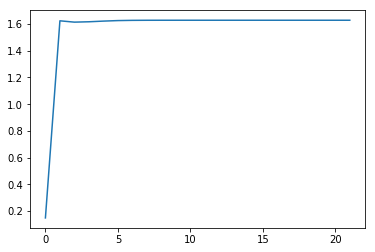

In [ ]:
from matplotlib import pyplot as plt

plt.plot(losses)

In [ ]:
with tf.Session() as sess:
  saver.restore(sess, save_path)
  acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
  print('Final accuracy:', acc)

W0701 11:06:45.491317 140210754443136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Final accuracy: 0.94292414


___ 25 ___ 32 ___ 0.0001 ___


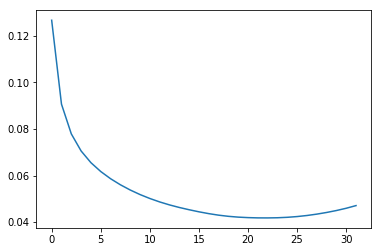

Final accuracy: 0.9878812
___ 50 ___ 32 ___ 0.0001 ___


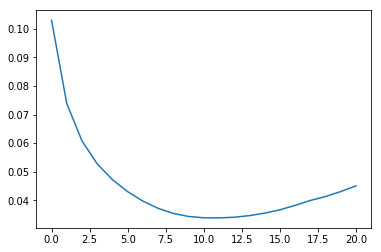

Final accuracy: 0.9847537
___ 75 ___ 32 ___ 0.0001 ___


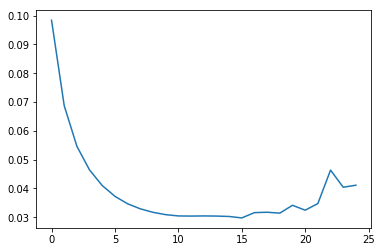

Final accuracy: 0.9878812
___ 100 ___ 32 ___ 0.0001 ___


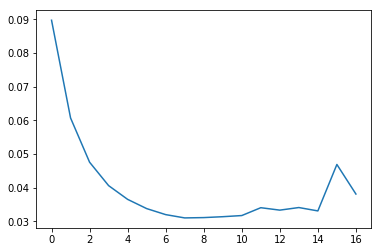

Final accuracy: 0.9859265
___ 125 ___ 32 ___ 0.0001 ___


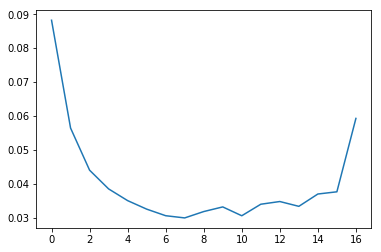

Final accuracy: 0.98905396
___ 150 ___ 32 ___ 0.0001 ___


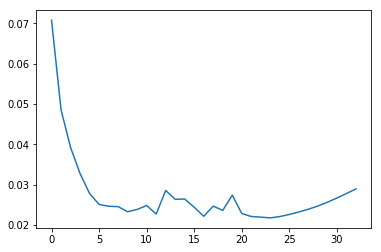

Final accuracy: 0.99296325
___ 175 ___ 32 ___ 0.0001 ___


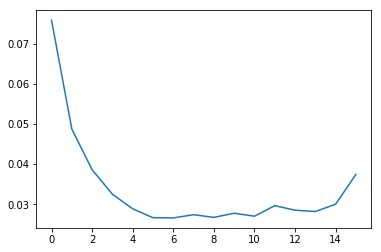

Final accuracy: 0.9898358
___ 200 ___ 32 ___ 0.0001 ___


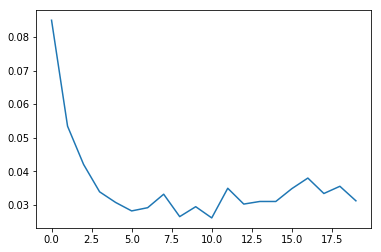

Final accuracy: 0.9921814
___ 25 ___ 64 ___ 0.0001 ___


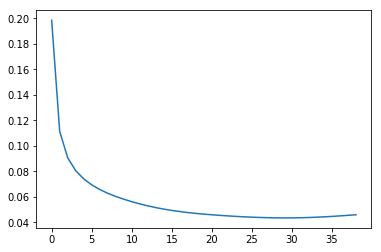

Final accuracy: 0.9859265
___ 50 ___ 64 ___ 0.0001 ___


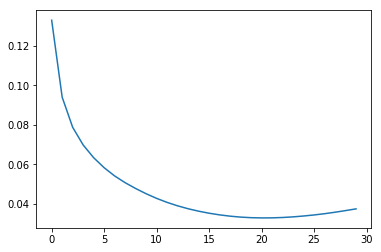

Final accuracy: 0.98631746
___ 75 ___ 64 ___ 0.0001 ___


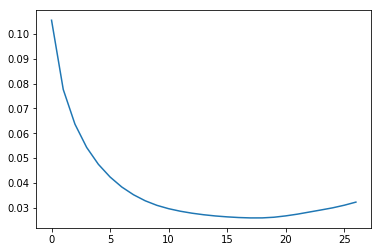

Final accuracy: 0.9917905
___ 100 ___ 64 ___ 0.0001 ___


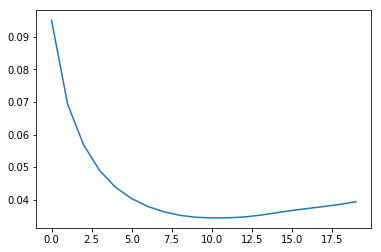

Final accuracy: 0.9878812
___ 125 ___ 64 ___ 0.0001 ___


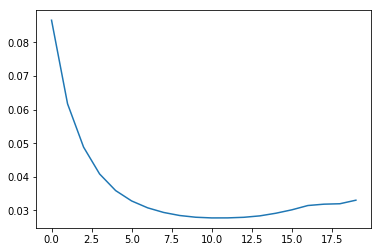

Final accuracy: 0.98670834
___ 150 ___ 64 ___ 0.0001 ___


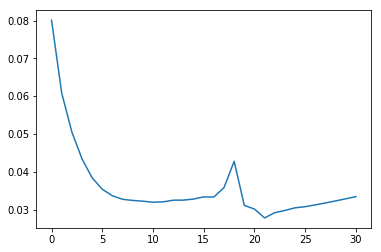

Final accuracy: 0.9898358
___ 175 ___ 64 ___ 0.0001 ___


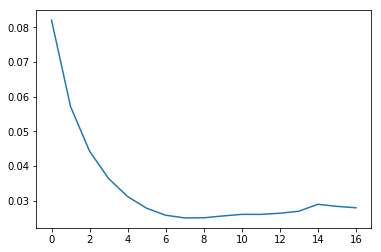

Final accuracy: 0.9917905
___ 200 ___ 64 ___ 0.0001 ___


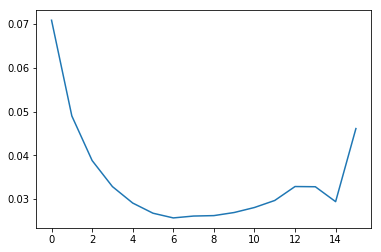

Final accuracy: 0.9898358
___ 25 ___ 128 ___ 0.0001 ___


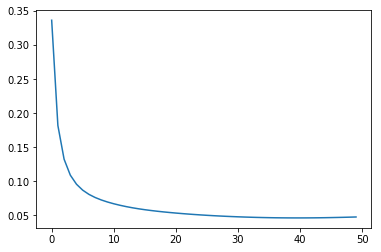

Final accuracy: 0.98319
___ 50 ___ 128 ___ 0.0001 ___


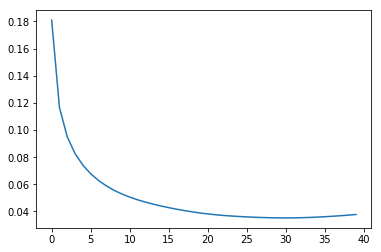

Final accuracy: 0.9882721
___ 75 ___ 128 ___ 0.0001 ___


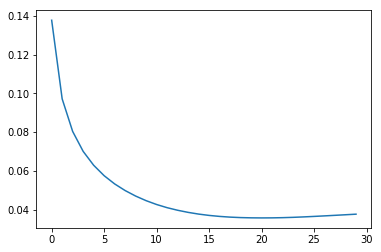

Final accuracy: 0.9878812
___ 100 ___ 128 ___ 0.0001 ___


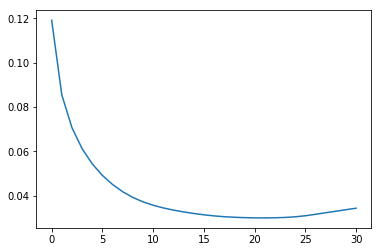

Final accuracy: 0.99022675
___ 125 ___ 128 ___ 0.0001 ___


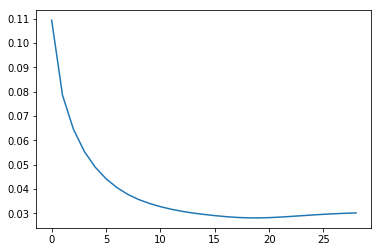

Final accuracy: 0.9878812
___ 150 ___ 128 ___ 0.0001 ___


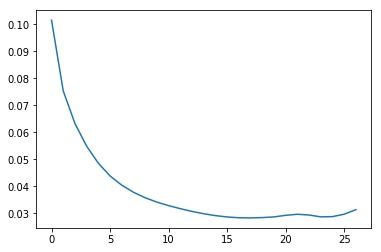

Final accuracy: 0.98905396
___ 175 ___ 128 ___ 0.0001 ___


KeyboardInterrupt: ignored

In [ ]:
for learning_rate in [1e-4, 1e-3, 1e-2, 0.1]:
  for batch_size in [32, 64, 128]:  
    for size in [25, 50, 75, 100, 125, 150, 175, 200]:
      print('___', size, '___', batch_size, '___', learning_rate, '___')
      tf.reset_default_graph()

      n_input = 28*28
      n_hidden = 100
      n_outputs = 5

      X = tf.placeholder(tf.float32, (None, n_input), name='X')
      y = tf.placeholder(tf.int64, (None), name='y')

      with tf.name_scope('DNN'):
        hidden = CreateDNN(X, 5, size)
        logits = tf.layers.dense(hidden, n_outputs, 
                                     kernel_initializer=tf.initializers.he_normal(), name='outputs')

      with tf.name_scope('Loss'):
        xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
        loss = tf.reduce_mean(xentr, name='loss')

      with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

      with tf.name_scope("eval"):
          correct = tf.nn.in_top_k(logits, y, 1)
          accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

      saver = tf.train.Saver()  

      init = tf.global_variables_initializer()

      losses = []
      best_loss = 999999
      iter_loss = 0
      stop = 0

      n_epochs = 1000
      #batch_size = 20

      with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
          if stop == 1:
            break

          rnd_idx = np.random.permutation(len(X_train1))
          for iteration in range(len(X_train1) // batch_size):     
            X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

          new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})

          losses.append(new_loss)
          iter_loss += 1

          if best_loss > new_loss:
            best_loss = new_loss
            iter_loss = 0
            save_path = saver.save(sess, './models/best_model'+str(learning_rate)+str(batch_size)+str(size)+'.ckpt')
          elif iter_loss > 8:
            break

          acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
          #if epoch % 7 == 0:
            #print(epoch, 'accuray:', acc, 'best loss:', best_loss)

      plt.plot(losses)
      plt.show()

      with tf.Session() as sess:
        saver.restore(sess, save_path)
        acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
        print('Final accuracy:', acc)

___ 100 ___ 128 ___ 0.0001 ___


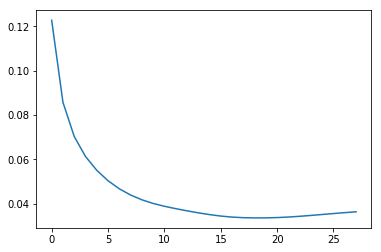

Final accuracy: 0.99022675


In [ ]:
for learning_rate in [1e-4]:
  for batch_size in [128]:  
    for size in [100]:
      print('___', size, '___', batch_size, '___', learning_rate, '___')
      tf.reset_default_graph()

      n_input = 28*28
      n_hidden = 100
      n_outputs = 5

      X = tf.placeholder(tf.float32, (None, n_input), name='X')
      y = tf.placeholder(tf.int64, (None), name='y')

      with tf.name_scope('DNN'):
        hidden = CreateDNN(X, 5, size)
        logits = tf.layers.dense(hidden, n_outputs, 
                                     kernel_initializer=tf.initializers.he_normal(), name='outputs')

      with tf.name_scope('Loss'):
        xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
        loss = tf.reduce_mean(xentr, name='loss')

      with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

      with tf.name_scope("eval"):
          correct = tf.nn.in_top_k(logits, y, 1)
          accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

      saver = tf.train.Saver()  

      init = tf.global_variables_initializer()

      losses = []
      best_loss = 999999
      iter_loss = 0
      stop = 0

      n_epochs = 1000
      #batch_size = 20

      with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
          if stop == 1:
            break

          rnd_idx = np.random.permutation(len(X_train1))
          for iteration in range(len(X_train1) // batch_size):     
            X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

          new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})

          losses.append(new_loss)
          iter_loss += 1

          if best_loss > new_loss:
            best_loss = new_loss
            iter_loss = 0
            save_path = saver.save(sess, './pretrained_model'+'.ckpt')
          elif iter_loss > 8:
            break

          acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
          #if epoch % 7 == 0:
            #print(epoch, 'accuray:', acc, 'best loss:', best_loss)

      plt.plot(losses)
      plt.show()

      with tf.Session() as sess:
        saver.restore(sess, save_path)
        acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
        print('Final accuracy:', acc)

Final accuracy: 0.99296325
___ 150 ___ 32 ___ 0.0001 ___

In [ ]:
def CreateDNN_BN(input_nn, training, n_layers=5, n_units=100, 
              activation_fn=tf.nn.elu, kernel_init=tf.initializers.he_normal(), momentum=0.9):
  for layer in range(n_layers):
    

    input_nn = tf.layers.dense(input_nn, n_units, 
                               kernel_initializer=kernel_init, name='hidden'+str(layer))
    input_nn = tf.layers.batch_normalization(input_nn, training=training, momentum=momentum)
    input_nn = activation_fn(input_nn)
  return input_nn

___ 25 ___ 32 ___ 0.0001 ___


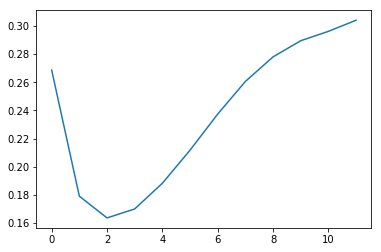

Final accuracy: 0.95660675
___ 50 ___ 32 ___ 0.0001 ___


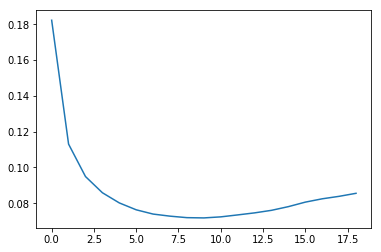

Final accuracy: 0.97224396
___ 100 ___ 32 ___ 0.0001 ___


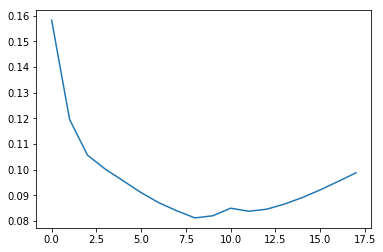

Final accuracy: 0.9702893
___ 150 ___ 32 ___ 0.0001 ___


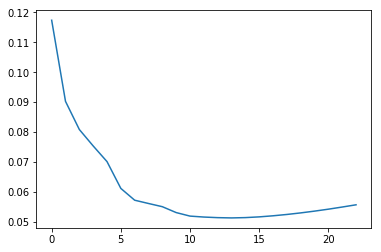

Final accuracy: 0.98279905
___ 200 ___ 32 ___ 0.0001 ___


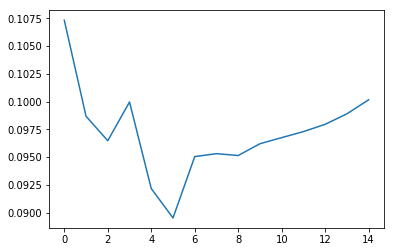

Final accuracy: 0.96950746
___ 25 ___ 32 ___ 0.001 ___


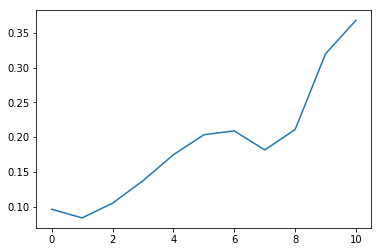

Final accuracy: 0.9765442
___ 50 ___ 32 ___ 0.001 ___


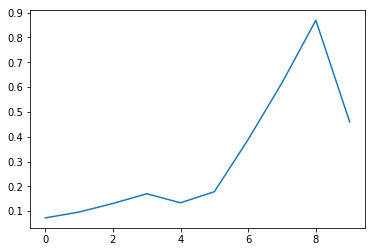

Final accuracy: 0.9765442
___ 100 ___ 32 ___ 0.001 ___


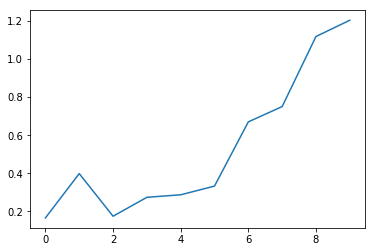

Final accuracy: 0.95699763
___ 150 ___ 32 ___ 0.001 ___


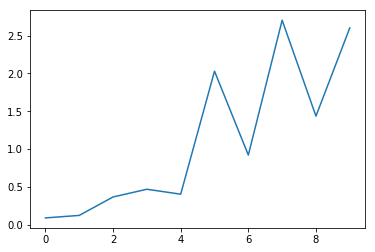

Final accuracy: 0.97615325
___ 200 ___ 32 ___ 0.001 ___


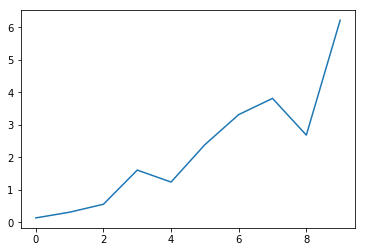

Final accuracy: 0.9749805


In [ ]:
for learning_rate in [1e-4, 1e-3]:
  for batch_size in [32]:  
    for size in [25, 50, 100, 150, 200]:
      print('___', size, '___', batch_size, '___', learning_rate, '___')
      tf.reset_default_graph()

      training = tf.placeholder_with_default(False, shape=(), name='training')

      n_input = 28*28
      n_hidden = 100
      n_outputs = 5

      X = tf.placeholder(tf.float32, (None, n_input), name='X')
      y = tf.placeholder(tf.int64, (None), name='y')

      with tf.name_scope('DNN'):
        hidden = CreateDNN_BN(X, training, 5, size)
        logits = tf.layers.dense(hidden, n_outputs, 
                                     kernel_initializer=tf.initializers.he_normal(), name='outputs')

      with tf.name_scope('Loss'):
        xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
        loss = tf.reduce_mean(xentr, name='loss')

      with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

      with tf.name_scope("eval"):
          correct = tf.nn.in_top_k(logits, y, 1)
          accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

      saver = tf.train.Saver()  

      init = tf.global_variables_initializer()

      losses = []
      best_loss = 999999
      iter_loss = 0
      stop = 0

      n_epochs = 1000
      #batch_size = 20

      with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
          if stop == 1:
            break

          rnd_idx = np.random.permutation(len(X_train1))
          for iteration in range(len(X_train1) // batch_size):     
            X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training:True})

          new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})

          losses.append(new_loss)
          iter_loss += 1

          if best_loss > new_loss:
            best_loss = new_loss
            iter_loss = 0
            save_path = saver.save(sess, './models/best_model'+str(learning_rate)+str(batch_size)+str(size)+'.ckpt')
          elif iter_loss > 8:
            break

          acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
          #if epoch % 7 == 0:
            #print(epoch, 'accuray:', acc, 'best loss:', best_loss)

      plt.plot(losses)
      plt.show()

      with tf.Session() as sess:
        saver.restore(sess, save_path)
        acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
        print('Final accuracy:', acc)

In [ ]:
def CreateDNN_BN_DO(input_nn, training, n_layers=5, n_units=100, 
              activation_fn=tf.nn.elu, kernel_init=tf.initializers.he_normal(), momentum=0.9, drop_rate=0.5):
  for layer in range(n_layers):    
    input_nn = tf.layers.dense(input_nn, n_units, 
                               kernel_initializer=kernel_init, name='hidden'+str(layer))
    input_nn = tf.layers.batch_normalization(input_nn, training=training, momentum=momentum, name='batch_norm'+str(layer))
    input_nn = activation_fn(input_nn)
    input_nn = tf.layers.dropout(input_nn, rate=drop_rate, training=training, name='dropout'+str(layer))
  return input_nn

W0701 11:55:09.451072 140210754443136 deprecation.py:323] From <ipython-input-24-1c8771515394>:8: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dropout instead.


___ 25 ___ 32 ___ 0.0001 ___


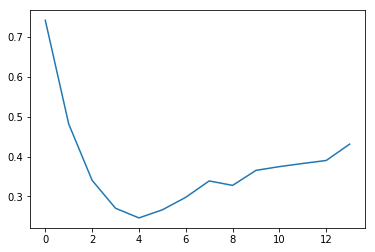

Final accuracy: 0.9229867
___ 50 ___ 32 ___ 0.0001 ___


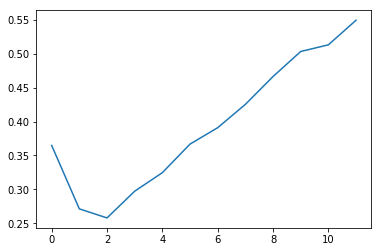

Final accuracy: 0.9374511
___ 100 ___ 32 ___ 0.0001 ___


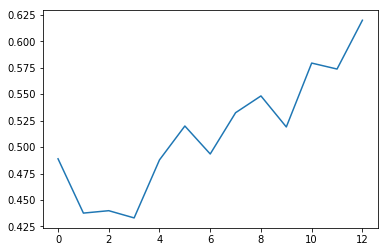

Final accuracy: 0.9534793
___ 150 ___ 32 ___ 0.0001 ___


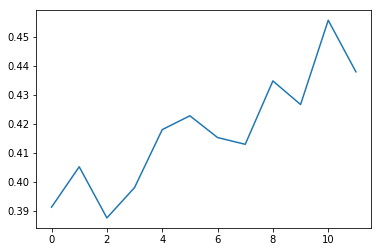

Final accuracy: 0.9515246
___ 200 ___ 32 ___ 0.0001 ___


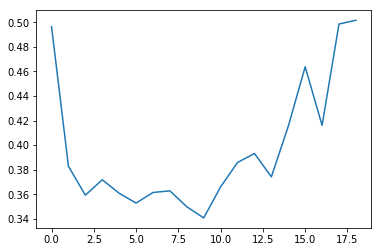

Final accuracy: 0.96950746
___ 25 ___ 64 ___ 0.0001 ___


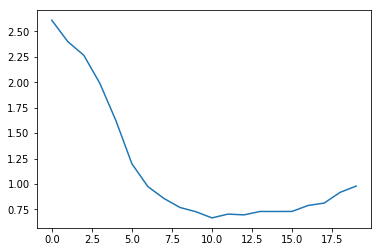

Final accuracy: 0.887412
___ 50 ___ 64 ___ 0.0001 ___


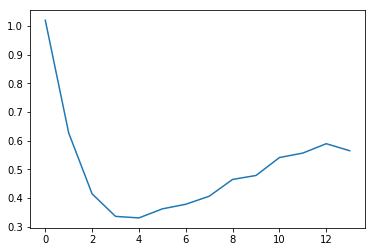

Final accuracy: 0.93432367
___ 100 ___ 64 ___ 0.0001 ___


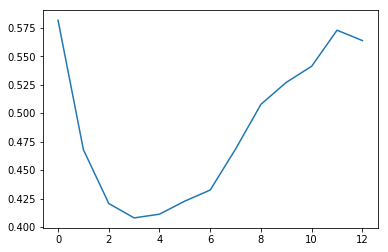

Final accuracy: 0.9421423
___ 150 ___ 64 ___ 0.0001 ___


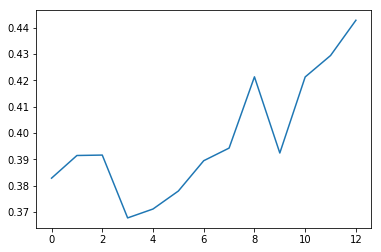

Final accuracy: 0.9562158
___ 200 ___ 64 ___ 0.0001 ___


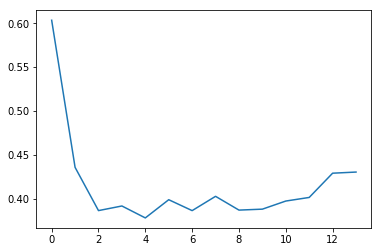

Final accuracy: 0.96207976
___ 25 ___ 32 ___ 0.001 ___


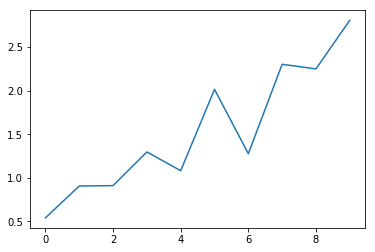

Final accuracy: 0.86200154
___ 50 ___ 32 ___ 0.001 ___


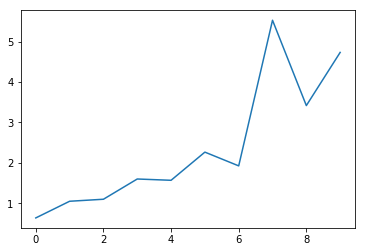

Final accuracy: 0.9405786
___ 100 ___ 32 ___ 0.001 ___


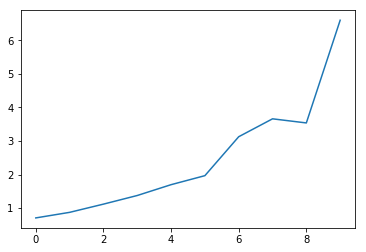

Final accuracy: 0.9507428
___ 150 ___ 32 ___ 0.001 ___


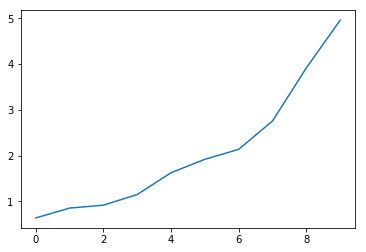

Final accuracy: 0.95113367
___ 200 ___ 32 ___ 0.001 ___


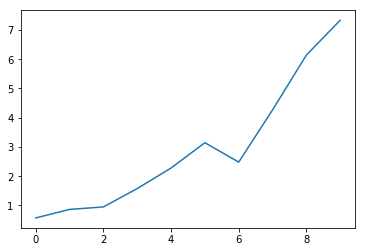

Final accuracy: 0.9601251
___ 25 ___ 64 ___ 0.001 ___


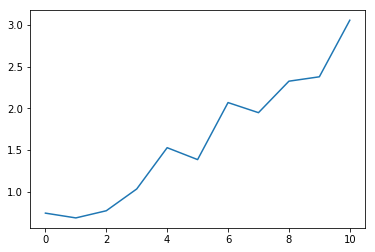

Final accuracy: 0.92494136
___ 50 ___ 64 ___ 0.001 ___


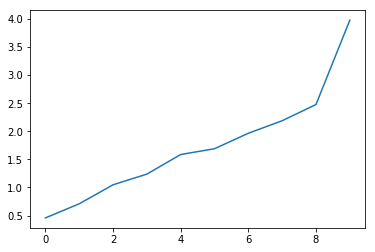

Final accuracy: 0.95035183
___ 100 ___ 64 ___ 0.001 ___


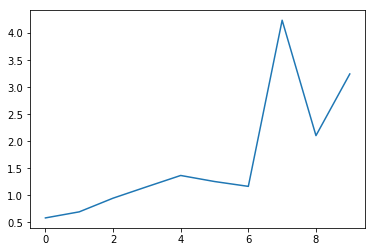

Final accuracy: 0.95113367
___ 150 ___ 64 ___ 0.001 ___


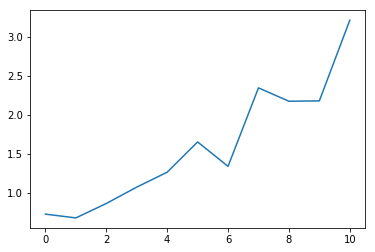

Final accuracy: 0.96051604
___ 200 ___ 64 ___ 0.001 ___


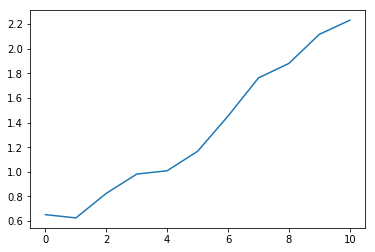

Final accuracy: 0.9652072


In [ ]:
for learning_rate in [1e-4, 1e-3]:
  for batch_size in [32, 64]:  
    for size in [25, 50, 100, 150, 200]:
      print('___', size, '___', batch_size, '___', learning_rate, '___')
      tf.reset_default_graph()

      training = tf.placeholder_with_default(False, shape=(), name='training')

      n_input = 28*28
      n_hidden = 100
      n_outputs = 5

      X = tf.placeholder(tf.float32, (None, n_input), name='X')
      y = tf.placeholder(tf.int64, (None), name='y')

      with tf.name_scope('DNN'):
        hidden = CreateDNN_BN_DO(X, training, 5, size)
        logits = tf.layers.dense(hidden, n_outputs, 
                                     kernel_initializer=tf.initializers.he_normal(), name='outputs')

      with tf.name_scope('Loss'):
        xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
        loss = tf.reduce_mean(xentr, name='loss')

      with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

      with tf.name_scope("eval"):
          correct = tf.nn.in_top_k(logits, y, 1)
          accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

      saver = tf.train.Saver()  

      init = tf.global_variables_initializer()

      losses = []
      best_loss = 999999
      iter_loss = 0
      stop = 0

      n_epochs = 1000
      #batch_size = 20

      with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
          if stop == 1:
            break

          rnd_idx = np.random.permutation(len(X_train1))
          for iteration in range(len(X_train1) // batch_size):     
            X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training:True})

          new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})

          losses.append(new_loss)
          iter_loss += 1

          if best_loss > new_loss:
            best_loss = new_loss
            iter_loss = 0
            save_path = saver.save(sess, './models/best_model'+str(learning_rate)+str(batch_size)+str(size)+'.ckpt')
          elif iter_loss > 8:
            break

          acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
          #if epoch % 7 == 0:
            #print(epoch, 'accuray:', acc, 'best loss:', best_loss)

      plt.plot(losses)
      plt.show()

      with tf.Session() as sess:
        saver.restore(sess, save_path)
        acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
        print('Final accuracy:', acc)

In [ ]:
losses = []
best_loss = 999999
iter_loss = 0
stop = 0

n_epochs = 1000
batch_size = 20

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    if stop == 1:
      break
    
    rnd_idx = np.random.permutation(len(X_train1))
    for iteration in range(len(X_train1) // batch_size):     
      X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
      
    new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})
    print(new_loss)
    losses.append(new_loss)
    iter_loss += 1
    
    if best_loss > new_loss:
      best_loss = new_loss
      iter_loss = 0
      save_path = saver.save(sess, './best_model.ckpt')
    elif iter_loss > 20:
      break
    
    acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
    print(epoch, 'accuray:', acc, 'best loss:', best_loss)
  

0.193924
0 accuray: 0.95680094 best loss: 0.193924
0.22142626
1 accuray: 0.96497375 best loss: 0.193924
0.25924078
2 accuray: 0.96925473 best loss: 0.193924
0.30078095
3 accuray: 0.97995716 best loss: 0.193924
0.28370777
4 accuray: 0.98345983 best loss: 0.193924
0.59817016
5 accuray: 0.97917885 best loss: 0.193924
0.53079885
6 accuray: 0.98268145 best loss: 0.193924
0.8278365
7 accuray: 0.98345983 best loss: 0.193924
1.8543787
8 accuray: 0.9758708 best loss: 0.193924
0.95799226
9 accuray: 0.98287606 best loss: 0.193924
1.2753736
10 accuray: 0.9865733 best loss: 0.193924
5.1744905
11 accuray: 0.9511578 best loss: 0.193924
2.5585513
12 accuray: 0.97995716 best loss: 0.193924
4.806902
13 accuray: 0.9735357 best loss: 0.193924
3.4093149
14 accuray: 0.9819031 best loss: 0.193924
9.8287115
15 accuray: 0.9698385 best loss: 0.193924
3.752592
16 accuray: 0.9859895 best loss: 0.193924
6.59305
17 accuray: 0.97917885 best loss: 0.193924
7.8263392
18 accuray: 0.980541 best loss: 0.193924
8.129041
1

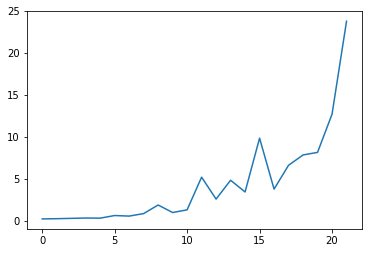

In [ ]:
plt.plot(losses)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
    print('Final accuracy:', acc)

Final accuracy: 0.95308834


### 9

In [ ]:

      print('___', size, '___', batch_size, '___', learning_rate, '___')
      tf.reset_default_graph()

      training = tf.placeholder_with_default(False, shape=(), name='training')

      n_input = 28*28
      n_hidden = 100
      n_outputs = 5

      X = tf.placeholder(tf.float32, (None, n_input), name='X')
      y = tf.placeholder(tf.int64, (None), name='y')

      with tf.name_scope('DNN'):
        hidden = CreateDNN_BN(X, training, 5, size)
        logits = tf.layers.dense(hidden, n_outputs, 
                                     kernel_initializer=tf.initializers.he_normal(), name='outputs')

      with tf.name_scope('Loss'):
        xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
        loss = tf.reduce_mean(xentr, name='loss')

      with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

      with tf.name_scope("eval"):
          correct = tf.nn.in_top_k(logits, y, 1)
          accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

      saver = tf.train.Saver()  

      init = tf.global_variables_initializer()

      losses = []
      best_loss = 999999
      iter_loss = 0
      stop = 0

      n_epochs = 1000
      #batch_size = 20

      with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
          if stop == 1:
            break

          rnd_idx = np.random.permutation(len(X_train1))
          for iteration in range(len(X_train1) // batch_size):     
            X_batch, y_batch = X_train1[iteration*batch_size:(iteration+1)*batch_size], y_train1[iteration*batch_size:(iteration+1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training:True})

          new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1})

          losses.append(new_loss)
          iter_loss += 1

          if best_loss > new_loss:
            best_loss = new_loss
            iter_loss = 0
            save_path = saver.save(sess, './models/best_model'+str(learning_rate)+str(batch_size)+str(size)+'.ckpt')
          elif iter_loss > 8:
            break

          acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1})
          #if epoch % 7 == 0:
            #print(epoch, 'accuray:', acc, 'best loss:', best_loss)

      plt.plot(losses)
      plt.show()

      with tf.Session() as sess:
        saver.restore(sess, save_path)
        acc = sess.run(accuracy, feed_dict={X: X_val1, y: y_val1})
        print('Final accuracy:', acc)

In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden = 100
n_outputs = 5

X = tf.placeholder(tf.float32, (None, n_input), name='X')
y = tf.placeholder(tf.int64, (None), name='y')

with tf.name_scope('DNN'):
  hidden = CreateDNN(X, 5, n_hidden)
  logits = tf.layers.dense(hidden, n_outputs, 
                               kernel_initializer=tf.initializers.he_normal(), name='outputs')
  
with tf.name_scope('Loss'):
  xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
  loss = tf.reduce_mean(xentr, name='loss')
  
with tf.name_scope('Train'):
  optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
  train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                   scope="hidden[34]|outputs")
  training_op = optimizer.minimize(loss, var_list=train_vars)
  
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
  
    
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[012]") # regular expression
restore_saver = tf.train.Saver(reuse_vars) # to restore layers 1-5

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
train_ids = mnist.train.labels >= 5
X_train2 = mnist.train.images[train_ids]
y_train2 = mnist.train.labels[train_ids] - 5

test_ids = mnist.test.labels >= 5
X_test2 = mnist.test.images[test_ids]
y_test2 = mnist.test.labels[test_ids] - 5

val_ids = mnist.validation.labels >= 5
X_val2 = mnist.validation.images[val_ids]
y_val2 = mnist.validation.labels[val_ids] - 5

In [ ]:
tmp_X = []
tmp_y = []

for digit in range(0, 4):
  ids = y_train2 == digit
  tmp_y.append(y_train2[ids][:100])
  tmp_X.append(X_train2[ids][:100])
  

In [ ]:
X_train2_tr = np.array(tmp_X).reshape(-1, 28*28)
y_train2_tr = np.array(tmp_y).reshape(-1)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
losses = []
best_loss = 999999
iter_loss = 0
stop = 0

n_epochs = 1000
batch_size = 20

with tf.Session() as sess:
  init.run()
  restore_saver.restore(sess, './pretrained_model.ckpt')
  for epoch in range(n_epochs):
    if stop == 1:
      break
    X_train2_tr, y_train2_tr = shuffle(X_train2_tr, y_train2_tr)
    for iteration in range(len(X_train2_tr) // batch_size):     
      X_batch, y_batch = X_train2_tr[iteration*batch_size:(iteration+1)*batch_size], y_train2_tr[iteration*batch_size:(iteration+1)*batch_size]
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      
    new_loss = sess.run(loss, feed_dict={X: X_val2, y: y_val2})
    
    losses.append(new_loss)
    iter_loss += 1
    
    if best_loss > new_loss:
      best_loss = new_loss
      iter_loss = 0
      save_path = saver.save(sess, './best_model.ckpt')
    elif iter_loss > 20:
      break
    
    acc = sess.run(accuracy, feed_dict={X: X_train2, y: y_train2})
    print(epoch, 'accuray:', acc, 'best loss:', best_loss)
  

0 accuray: 0.23080632 best loss: 1.8640949
1 accuray: 0.37779096 best loss: 1.5862253
2 accuray: 0.4924709 best loss: 1.4396133
3 accuray: 0.55593055 best loss: 1.3512251
4 accuray: 0.59294564 best loss: 1.3057672
5 accuray: 0.6187226 best loss: 1.2791485
6 accuray: 0.6324457 best loss: 1.2637471
7 accuray: 0.6463912 best loss: 1.2618023
8 accuray: 0.6520659 best loss: 1.260046
9 accuray: 0.66193163 best loss: 1.260046
10 accuray: 0.66738373 best loss: 1.260046
11 accuray: 0.67112976 best loss: 1.260046
12 accuray: 0.6746161 best loss: 1.260046
13 accuray: 0.6786959 best loss: 1.260046
14 accuray: 0.68255323 best loss: 1.260046
15 accuray: 0.6847786 best loss: 1.260046
16 accuray: 0.6856687 best loss: 1.260046
17 accuray: 0.68934053 best loss: 1.260046
18 accuray: 0.6901936 best loss: 1.260046
19 accuray: 0.6929753 best loss: 1.260046
20 accuray: 0.6943476 best loss: 1.260046
21 accuray: 0.69516355 best loss: 1.260046
22 accuray: 0.69720346 best loss: 1.260046
23 accuray: 0.69750017 be

In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden = 100
n_outputs = 5

y = tf.placeholder(tf.int32, shape=[None, 1])

X = tf.placeholder(tf.float32, shape=(None, 2, n_input), name="X")
X1, X2 = tf.unstack(X, axis=1)

with tf.name_scope('A_net'):
  hidden_A = CreateDNN(X1, name='A')
  
with tf.name_scope('B_net'):
  hidden_B = CreateDNN(X2, name='B')
  
with tf.name_scope('AB_net'):
  conc = tf.concat([hidden_A, hidden_B], axis=1)
  hidden = tf.layers.dense(conc, 10, activation=tf.nn.elu,
                               kernel_initializer=tf.initializers.he_normal(), name='hidden_nets')
  logits = tf.layers.dense(hidden, 1)
  y_prob = tf.nn.sigmoid(loggits)
  
with tf.name_scope('Loss'):
  y_as_float = tf.cast(y, tf.float32)
  xentr = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_as_float, logits=logits)
  loss = tf.reduce_mean(xentr, name='loss')
  
with tf.name_scope('Train'):
  optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.95, use_nesterov=True)
  training_op = optimizer.minimize(loss)
  
with tf.name_scope("eval"):
  y_pred = tf.cast(tf.greater_equal(logits, 0.5), tf.int32)
  y_pred_correct = tf.equal(y_pred, y)
  accuracy = tf.reduce_mean(tf.cast(y_pred_correct, tf.float32))
  
saver = tf.train.Saver()  
  
init = tf.global_variables_initializer()
  

In [ ]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [ ]:
def Get_batch(X_b, y_b, batch_size=64):
  half = batch_size // 2
  X_b, y_b = shuffle(X_b, y_b)
  X_o, y_o = [], []
  
  i = 0
  while len(X_o) < half:
    rnd_idx1, rnd_idx2 = np.random.randint(0, len(X_b), 2)
    if y_b[rnd_idx1] == y_b[rnd_idx2]:
      y_o.append(1)
      X_o.append(np.array([X_b[rnd_idx1], X_b[rnd_idx2]]))
  while len(X_o) < batch_size:
    rnd_idx1, rnd_idx2 = np.random.randint(0, len(X_b), 2)
    if y_b[rnd_idx1] != y_b[rnd_idx2]:
      y_o.append(0)
      X_o.append(np.array([X_b[rnd_idx1], X_b[rnd_idx2]]))
      
  X_o, y_o = shuffle(X_o, y_o)
  return np.array(X_o), np.array(y_o)

In [ ]:
batch_size = 5
X_batch, y_batch = Get_batch(X_train, y_train, batch_size)

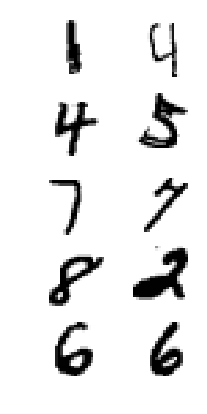

In [ ]:
plt.figure(figsize=(3, 3 * batch_size))
plt.subplot(121)
plt.imshow(X_batch[:,0].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.subplot(122)
plt.imshow(X_batch[:,1].reshape(28 * batch_size, 28), cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()

In [ ]:
X_test1, y_test1 = Get_batch(X_test, y_test, batch_size=len(X_val))

In [ ]:
n_epochs = 20
batch_size = 512

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    if stop == 1:
      break
    for iteration in range(len(X_train) // batch_size):     
      X_batch, y_batch = Get_batch(X_train, y_train, batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y: y_batch.reshape(-1, 1)})
    
    new_loss = sess.run(loss, feed_dict={X: X_test1, y: y_test1.reshape(-1, 1)})
    print(epoch, 'Loss:', new_loss)
    if epoch % 10 == 0:
      acc = sess.run(accuracy, feed_dict={X: X_test1, y: y_test1.reshape(-1, 1)})
      print('ACCURACY:', acc)
  comp_path = saver.save(sess, './comp_model.ckpt')

0 Loss: 0.50971955
ACCURACY: 0.7154
1 Loss: 0.3893422
2 Loss: 0.30882797
3 Loss: 0.26900122
4 Loss: 0.2302913
5 Loss: 0.21658126
6 Loss: 0.19022697
7 Loss: 0.19056179
8 Loss: 0.16507734
9 Loss: 0.15958779
10 Loss: 0.14615537
ACCURACY: 0.9456
11 Loss: 0.13564412
12 Loss: 0.13714138
13 Loss: 0.12580834
14 Loss: 0.1253275
15 Loss: 0.11855608
16 Loss: 0.1106898
17 Loss: 0.110067576
18 Loss: 0.10745012
19 Loss: 0.1061584


In [ ]:
tf.reset_default_graph()

n_input = 28*28
n_hidden = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_input), name="X")
y = tf.placeholder(tf.int32, shape=[None], name='y')

with tf.name_scope('A_net'):
  A_out = CreateDNN(X, name='A')
  frozen = tf.stop_gradient(A_out)
  logits = tf.layers.dense(frozen, 10,
                               kernel_initializer=tf.initializers.he_normal(), name='outputs')
  y_pred = tf.nn.sigmoid(logits)

with tf.name_scope('Loss'):
  xentr = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
  loss = tf.reduce_mean(xentr, name='loss')
  
with tf.name_scope('Train'):
  optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.95, use_nesterov=True)
  training_op = optimizer.minimize(loss)
  
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
  
  
dnn_A_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="A")
restore_saver = tf.train.Saver(var_list={var.op.name: var for var in dnn_A_vars})  
  
saver = tf.train.Saver()  
  
init = tf.global_variables_initializer()

In [ ]:
n_epochs = 100
batch_size = 50

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, comp_path)
    for epoch in range(n_epochs):
      X_tr, y_tr = shuffle(X_val, y_val)
      for iteration in range(len(X_tr) // batch_size):     
        X_batch, y_batch = X_tr[iteration*batch_size:(iteration+1)*batch_size], y_tr[iteration*batch_size:(iteration+1)*batch_size]
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
      new_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
      print(epoch, 'loss:', new_loss)
      if epoch % 10 == 0:
        acc = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
        print('ACC:', acc)

0 loss: 0.20116314
ACC: 0.9513
1 loss: 0.1689922
2 loss: 0.15449028
3 loss: 0.15424694
4 loss: 0.14718845
5 loss: 0.14434288
6 loss: 0.14107475
7 loss: 0.14239123
8 loss: 0.14190891
9 loss: 0.14484018
10 loss: 0.14151104
ACC: 0.9564
11 loss: 0.1385562
12 loss: 0.14468512
13 loss: 0.14740382
14 loss: 0.14359516
15 loss: 0.14200819
16 loss: 0.14233382
17 loss: 0.1435384
18 loss: 0.14623418
19 loss: 0.14363484
20 loss: 0.14686264
ACC: 0.955
21 loss: 0.14670488
22 loss: 0.14519463
23 loss: 0.14868905
24 loss: 0.14645267
25 loss: 0.14857139
26 loss: 0.15013371
27 loss: 0.14583504
28 loss: 0.14992161
29 loss: 0.15549742
30 loss: 0.14948763
ACC: 0.956
31 loss: 0.14700186
32 loss: 0.1496283
33 loss: 0.14896138
34 loss: 0.14954376
35 loss: 0.14915703
36 loss: 0.15253359
37 loss: 0.1557288
38 loss: 0.1516797
39 loss: 0.1540903
40 loss: 0.15422891
ACC: 0.953
41 loss: 0.15479255
42 loss: 0.15532836
43 loss: 0.15545627
44 loss: 0.15459728
45 loss: 0.15550365
46 loss: 0.15374775
47 loss: 0.15573445


(5000, 784)